___

#### DS7333 Quantifying the World: Case Study 1
#### Rick Fontenot, Feby Thomas Cheruvathoor
___


The goal for this case study is to build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature as closely as possible. In addition, we will evaluate which variable carries the most importance.

The approach for this Notebook will cover the following topics: 

1) EDA: check missing values, impute as needed, visualizations and summary statistics, outliers, multicollinearity
2) Cross Validation: split off validation set to compare overfitting on unseen data, use 10-fold CV with remaining data to tune models
3) Set up framework for residual checks on regression models
4) Linear Regression, L1, L2 models: compare error metrics and feature importance
5) Run tuned models on validation set and compare metrics to evaluate overfitting 
 

<a id="Prologue"></a>
# Preliminary Data Preparation
Cleaning raw data and new feature creation

- Imports
- load data
- Check missing values
- handling missing values
- check for duplicates

In [438]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno


### Load the raw data


In [439]:
# Load Train Data
train=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/QTW/main/Case%20Study%201/data/train.csv")

train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [453]:
# Load unique_m Data
unique_m=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/QTW/main/Case%20Study%201/data/unique_m.csv")

unique_m.head()

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [454]:
# Join data sets

#Drop critical temp since it's duplicated in sets
train.drop('critical_temp', axis=1, inplace=True)

df = pd.concat([train,unique_m], axis=1)
print(df.shape)

df.head()

(21263, 169)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [455]:
# Examin Data types
df.dtypes


number_of_elements                   int64
mean_atomic_mass                   float64
wtd_mean_atomic_mass               float64
gmean_atomic_mass                  float64
wtd_gmean_atomic_mass              float64
entropy_atomic_mass                float64
wtd_entropy_atomic_mass            float64
range_atomic_mass                  float64
wtd_range_atomic_mass              float64
std_atomic_mass                    float64
wtd_std_atomic_mass                float64
mean_fie                           float64
wtd_mean_fie                       float64
gmean_fie                          float64
wtd_gmean_fie                      float64
entropy_fie                        float64
wtd_entropy_fie                    float64
range_fie                          float64
wtd_range_fie                      float64
std_fie                            float64
wtd_std_fie                        float64
mean_atomic_radius                 float64
wtd_mean_atomic_radius             float64
gmean_atomi

### Check missing values
 There are no missing values

In [456]:
df.isna().sum()

number_of_elements                 0
mean_atomic_mass                   0
wtd_mean_atomic_mass               0
gmean_atomic_mass                  0
wtd_gmean_atomic_mass              0
entropy_atomic_mass                0
wtd_entropy_atomic_mass            0
range_atomic_mass                  0
wtd_range_atomic_mass              0
std_atomic_mass                    0
wtd_std_atomic_mass                0
mean_fie                           0
wtd_mean_fie                       0
gmean_fie                          0
wtd_gmean_fie                      0
entropy_fie                        0
wtd_entropy_fie                    0
range_fie                          0
wtd_range_fie                      0
std_fie                            0
wtd_std_fie                        0
mean_atomic_radius                 0
wtd_mean_atomic_radius             0
gmean_atomic_radius                0
wtd_gmean_atomic_radius            0
entropy_atomic_radius              0
wtd_entropy_atomic_radius          0
r

## Check Summary Statistics

In [457]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,4.11522

## Columns with all zeros:
While there were no missing values observed, the summary stats show that some columns have all zeros and are essentially blank and could be removed

In [458]:
max = df.max().to_frame()
max.rename(columns={ max.columns[0]: "Max" }, inplace = True)

min = df.min().to_frame()
min.rename(columns={ min.columns[0]: "Min" }, inplace = True)

minmax = pd.concat([min,max], axis=1)
#minmax.head(100)

minmax0 = minmax[(minmax['Min'] == 0) & (minmax['Max'] == 0)]
#minmax0.head(100)

all_zeros = minmax0.index.tolist()
print(all_zeros)


['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']


## Remove empty columns

In [459]:
print("Before dropping: ",df.shape)
df = df.drop(all_zeros, axis=1)
print("After dropping: ",df.shape)


Before dropping:  (21263, 169)
After dropping:  (21263, 160)


## Check for Duplicate Data

In [460]:
# Check for duplicate rows
print('Duplicate rows: ',df.duplicated(keep='first').sum())


Duplicate rows:  0


There are not exact duplicate rows, but below shows that there are duplicate entries for materials


In [461]:
materials_count = pd.DataFrame(df.groupby('material').size())
materials_count.rename(columns={ materials_count.columns[0]: "Count" }, inplace = True)


materials_count.sort_values('Count', ascending = False).head(20)

,Count
material,
Y1Ba2Cu3O7,110
Bi2Sr2Ca1Cu2O8,80
La1.85Sr0.15Cu1O4,51
B2Mg1,46
Tl2Ba2Cu1O6,45
Bi2Sr2Ca1Cu2O,44
Y1Ba2Cu3O,44
Y1Ba2Cu4O8,40
Nd1.85Ce0.15Cu1O4,32


In [462]:
Y1Ba2Cu3O7 = pd.DataFrame(df[df.material == 'Y1Ba2Cu3O7'])
Y1Ba2Cu3O7.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp,material
86,4,76.444563,51.245665,59.356672,34.935266,1.199541,1.291888,121.3276,14.288319,43.823354,44.192125,794.0,1003.623077,741.629349,937.559192,1.315004,0.890516,810.6,659.715385,311.743492,342.396001,164.5,114.538462,139.000514,89.685191,1.256701,1.339743,205,22.615385,77.525802,79.235399,4235.85725,2952.461769,669.556588,66.342169,1.015407,0.812798,8958.571,2066.922846,3194.938946,3639.129247,77.2375,109.169231,53.527965,86.539377,1.105182,0.762761,127.05,74.353846,54.830755,49.445714,8.1805,5.250308,4.035569,1.33692,1.112098,1.042927,12.878,2.903538,4.948155,5.648557,108.756645,96.398928,7.552385,1.096295,0.336262,0.203148,399.97342,92.29338,168.301047,166.440383,2.25,2.076923,2.213364,2.063362,1.368922,1.201823,1,0.846154,0.433013,0.266469,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.00,Y1Ba2Cu3O7
89,4,76.444563,51.245665,59.356672,34.935266,1.199541,1.291888,121.3276,14.288319,43.823354,44.192125,794.0,1003.623077,741.629349,937.559192,1.315004,0.890516,810.6,659.715385,311.743492,342.396001,164.5,114.538462,139.000514,89.685191,1.256701,1.339743,205,22.615385,77.525802,79.235399,4235.85725,2952.461769,669.556588,66.342169,1.015407,0.812798,8958.571,2066.922846,3194.938946,3639.129247,77.2375,109.169231,53.527965,86.539377,1.105182,0.762761,127.05,74.353846,54.830755,49.445714,8.1805,5.250308,4.035569,1.33692,1.112098,1.042927,12.878,2.903538,4.948155,5.648557,108.756645,96.398928,7.552385,1.096295,0.336262,0.203148,399.97342,92.29338,168.301047,166.440383,2.25,2.076923,2.213364,2.063362,1.368922,1.201823,1,0.846154,0.433013,0.266469,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.00,Y1Ba2Cu3O7
90,4,76.444563,51.245

This sample material with the most entries appears to have identical compound information but multiple unique critical temperature measurements

### 

In [463]:
df = pd.DataFrame(df.groupby('material').mean())

print(df.shape)
df.head()

(15542, 159)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ag0.002Al0.998,2.0,67.424869,27.143312,53.948587,27.056422,0.500522,0.046344,80.886661,26.711839,40.443331,3.613742,653.850000,577.5066,649.341667,577.471972,0.686260,0.017654,153.3,574.5846,76.650000,6.848925,141.500000,118.094,139.534942,118.079148,0.679292,0.019222,47.0,117.434,23.500000,2.099801,6595.000000,2715.58,5321.935738,2707.338677,0.506850,0.045268,7790.0,2673.62,3895.000000,348.030837,85.550000,44.1662,74.782351,44.093448,0.570065,0.035424,83.1,43.6578,41.550000,3.712627,11.000000,10.70120,10.995908,10.701168,0.692775,0.015119,0.60,10.65600,0.300000,0.026806,332.500000,235.390,317.883627,235.284146,0.649516,0.024151,195.0,233.670,97.50000,8.711940,2.000000,2.996,1.732051,2.993416,0.562335,0.005548,2.0,2.992,1.000000,0.089353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.002,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.128
Ag0.005Zn0.995,2.0,86.624100,65.592441,83.978705,65.543882,0.662766,0.047664,42.488200,64.513759,21.244100,2.996849,818.150000,904.9235,813.441393,904.826384,0.687398,0.026278,175.3,897.6185,87.650000,12.364554,153.500000,142.115,153.068612,142.106624,0.690338,0.035679,23.0,140.465,11.500000,1.622275,8815.000000,7156.75,8654.397726,7153.747352,0.674984,0.043330,3350.0,7051.85,1675.000000,236.287828,64.300000,2.1280,13.807607,1.533669,0.063515,0.609705,125.6,0.8570,62.800000,8.859030,9.325000,7.36975,9.113452,7.365823,0.670548,0.044980,3.95,7.25675,1.975000,0.278608,275.000000,121.550,227.156334,120.768225,0.524597,0.088900,310.0,117.250,155.00000,21.865441,1.500000,1.995,1.414214,1.993081,0.636514,0.017513,1.0,1.985,0.500000,0.070534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.005,0.00,0.0,0.000,0.0

## A closer look on response variable, **Critical Temperature**

From the histogram and QQ-plot, the variable show heavily righ-skewed distribution.

Skewness: 0.900920
Kurtosis: -0.451083


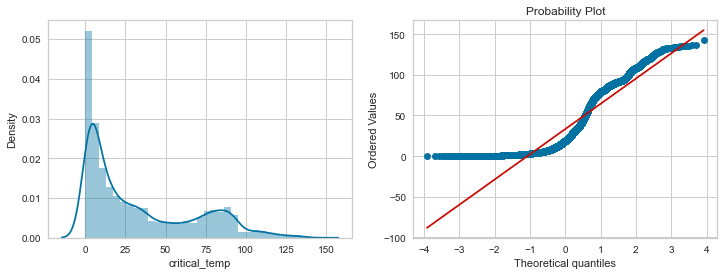

In [464]:
import matplotlib
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.distplot(df['critical_temp'], ax=ax[0])
stats.probplot(df['critical_temp'], dist="norm", plot=ax[1])

print("Skewness: %f" % df['critical_temp'].skew())
print("Kurtosis: %f" % df['critical_temp'].kurt())

Log transformation might help making the response variable more normally distributed.

Skewness: -0.913767
Kurtosis: 1.065447


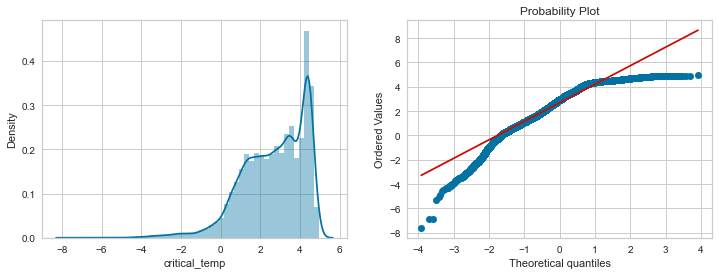

In [465]:
log_temp = np.log(df['critical_temp'])

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.distplot(log_temp, ax=ax[0])
stats.probplot(log_temp, dist="norm", plot=ax[1])

print("Skewness: %f" % log_temp.skew())
print("Kurtosis: %f" % log_temp.kurt())

In [466]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_constant = df.assign(const=1)
#df_constant.drop('material', axis=1, inplace=True)
df_constant.drop('critical_temp', axis=1, inplace=True)


VIF = pd.DataFrame([variance_inflation_factor(df_constant.values, i) 
               for i in range(df_constant.shape[1])])

VIF.rename(columns={ VIF.columns[0]: "VIF" }, inplace = True)
VIF['Feature'] = df_constant.columns

VIF.VIF = VIF.VIF.round()



In [467]:
temp = VIF.sort_values('VIF', ascending=False)

temp.head(200)

,VIF,Feature
12,8827.0,wtd_mean_fie
14,6036.0,wtd_gmean_fie
72,5196.0,wtd_mean_Valence
24,4952.0,wtd_gmean_atomic_radius
74,4474.0,wtd_gmean_Valence
15,4244.0,entropy_fie
25,3375.0,entropy_atomic_radius
22,3314.0,wtd_mean_atomic_radius
158,2645.0,const
71,2566.0,mean_Valence


<AxesSubplot:xlabel='VIF', ylabel='Count'>

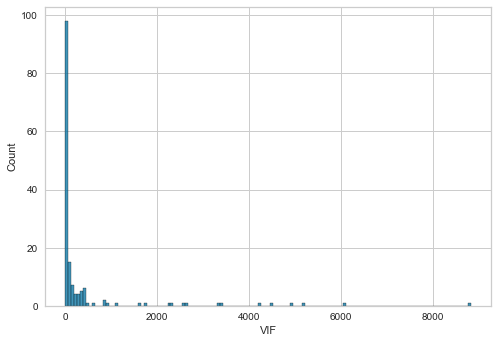

In [468]:
sns.histplot(VIF.VIF)


In [469]:
highest_VIF = ['wtd_mean_fie', 'wtd_gmean_fie', 'wtd_mean_Valence', 'wtd_gmean_atomic_radius']

temp2 = df_constant
temp2.drop(highest_VIF, axis=1, inplace=True)


VIF2 = pd.DataFrame([variance_inflation_factor(temp2.values, i) 
               for i in range(temp2.shape[1])])

VIF2.rename(columns={ VIF2.columns[0]: "VIF" }, inplace = True)
VIF2['Feature'] = temp2.columns

VIF2.VIF = VIF2.VIF.round()

VIF2 = VIF2.sort_values('VIF', ascending=False)

VIF2.head(200)

,VIF,Feature
13,3492.0,entropy_fie
22,2860.0,entropy_atomic_radius
154,2413.0,const
71,1544.0,entropy_Valence
11,1305.0,mean_fie
69,1058.0,gmean_Valence
68,1046.0,mean_Valence
12,1027.0,gmean_fie
4,809.0,wtd_gmean_atomic_mass
2,784.0,wtd_mean_atomic_mass


In [470]:
high_VIF = ['entropy_fie', 'entropy_atomic_radius', 'entropy_Valence', 'mean_fie']

temp3 = temp2
temp3.drop(high_VIF, axis=1, inplace=True)


VIF3 = pd.DataFrame([variance_inflation_factor(temp3.values, i) 
               for i in range(temp3.shape[1])])

VIF3.rename(columns={ VIF3.columns[0]: "VIF" }, inplace = True)
VIF3['Feature'] = temp3.columns

VIF3.VIF = VIF3.VIF.round()

VIF3 = VIF3.sort_values('VIF', ascending=False)

VIF3.head(200)

,VIF,Feature
150,2325.0,const
4,802.0,wtd_gmean_atomic_mass
2,780.0,wtd_mean_atomic_mass
65,677.0,mean_Valence
66,668.0,gmean_Valence
46,565.0,wtd_mean_FusionHeat
19,458.0,gmean_atomic_radius
48,422.0,wtd_gmean_FusionHeat
63,396.0,std_ThermalConductivity
28,393.0,wtd_gmean_Density


In [471]:
high_VIF2 = ['wtd_gmean_atomic_mass', 'wtd_mean_atomic_mass', 'mean_Valence', 'gmean_Valence']

temp4 = temp3
temp4.drop(high_VIF2, axis=1, inplace=True)


VIF4 = pd.DataFrame([variance_inflation_factor(temp4.values, i) 
               for i in range(temp4.shape[1])])

VIF4.rename(columns={ VIF4.columns[0]: "VIF" }, inplace = True)
VIF4['Feature'] = temp4.columns

VIF4.VIF = VIF4.VIF.round()

VIF4 = VIF4.sort_values('VIF', ascending=False)

VIF4.head(200)

,VIF,Feature
146,2279.0,const
44,551.0,wtd_mean_FusionHeat
17,454.0,gmean_atomic_radius
46,413.0,wtd_gmean_FusionHeat
61,381.0,std_ThermalConductivity
26,341.0,wtd_gmean_Density
15,341.0,mean_atomic_radius
51,332.0,std_FusionHeat
43,302.0,mean_FusionHeat
59,293.0,range_ThermalConductivity


In [472]:
high_VIF3 = ['wtd_mean_FusionHeat', 'gmean_atomic_radius', 'wtd_gmean_FusionHeat', 'std_ThermalConductivity', 'std_FusionHeat', 'wtd_gmean_Density', 'mean_atomic_radius']

temp5 = temp4
temp5.drop(high_VIF3, axis=1, inplace=True)


VIF5 = pd.DataFrame([variance_inflation_factor(temp5.values, i) 
               for i in range(temp5.shape[1])])

VIF5.rename(columns={ VIF5.columns[0]: "VIF" }, inplace = True)
VIF5['Feature'] = temp5.columns

VIF5.VIF = VIF5.VIF.round()

VIF5 = VIF5.sort_values('VIF', ascending=False)

VIF5.head(200)

,VIF,Feature
139,1875.0,const
11,273.0,range_fie
16,219.0,wtd_entropy_atomic_radius
13,211.0,std_fie
57,179.0,wtd_entropy_Valence
31,177.0,wtd_mean_ElectronAffinity
17,153.0,range_atomic_radius
2,150.0,gmean_atomic_mass
1,143.0,mean_atomic_mass
3,137.0,entropy_atomic_mass


In [473]:
high_VIF4 = ['range_fie', 'std_fie', 'wtd_entropy_atomic_radius', 'wtd_mean_ElectronAffinity', 'wtd_entropy_Valence', 'range_atomic_radius', 'gmean_atomic_mass']

temp6 = temp5
temp6.drop(high_VIF4, axis=1, inplace=True)


VIF6 = pd.DataFrame([variance_inflation_factor(temp6.values, i) 
               for i in range(temp6.shape[1])])

VIF6.rename(columns={ VIF6.columns[0]: "VIF" }, inplace = True)
VIF6['Feature'] = temp6.columns

VIF6.VIF = VIF6.VIF.round()

VIF6 = VIF6.sort_values('VIF', ascending=False)

VIF6.head(200)

,VIF,Feature
132,1727.0,const
2,117.0,entropy_atomic_mass
49,102.0,wtd_std_ThermalConductivity
34,99.0,mean_FusionHeat
47,99.0,range_ThermalConductivity
19,92.0,entropy_Density
32,87.0,std_ElectronAffinity
3,83.0,wtd_entropy_atomic_mass
42,78.0,wtd_mean_ThermalConductivity
18,73.0,gmean_Density


In [474]:
high_VIF5 = ['entropy_atomic_mass', 'wtd_std_ThermalConductivity', 'range_ThermalConductivity', 'mean_FusionHeat', 'entropy_Density', 'std_ElectronAffinity', 'wtd_entropy_atomic_mass']

temp7 = temp6
temp7.drop(high_VIF5, axis=1, inplace=True)


VIF7 = pd.DataFrame([variance_inflation_factor(temp7.values, i) 
               for i in range(temp7.shape[1])])

VIF7.rename(columns={ VIF7.columns[0]: "VIF" }, inplace = True)
VIF7['Feature'] = temp7.columns

VIF7.VIF = VIF7.VIF.round()

VIF7 = VIF7.sort_values('VIF', ascending=False)

VIF7.head(200)

,VIF,Feature
125,1645.0,const
20,64.0,std_Density
16,63.0,gmean_Density
14,57.0,mean_Density
18,53.0,range_Density
13,53.0,wtd_std_atomic_radius
2,50.0,range_atomic_mass
37,50.0,wtd_mean_ThermalConductivity
22,50.0,mean_ElectronAffinity
7,49.0,wtd_entropy_fie


In [475]:
high_VIF6 = ['std_Density', 'gmean_Density', 'range_Density', 'mean_Density', 'range_atomic_mass', 'wtd_std_atomic_radius', 'std_Valence']

temp8 = temp7
temp8.drop(high_VIF6, axis=1, inplace=True)


VIF8 = pd.DataFrame([variance_inflation_factor(temp8.values, i) 
               for i in range(temp8.shape[1])])

VIF8.rename(columns={ VIF8.columns[0]: "VIF" }, inplace = True)
VIF8['Feature'] = temp8.columns

VIF8.VIF = VIF8.VIF.round()

VIF8 = VIF8.sort_values('VIF', ascending=False)

VIF8.head(200)

,VIF,Feature
118,1508.0,const
16,50.0,mean_ElectronAffinity
6,47.0,wtd_entropy_fie
31,47.0,wtd_mean_ThermalConductivity
17,46.0,gmean_ElectronAffinity
25,34.0,entropy_FusionHeat
0,34.0,number_of_elements
36,29.0,wtd_range_ThermalConductivity
19,29.0,entropy_ElectronAffinity
12,27.0,wtd_mean_Density


In [476]:
high_VIF7 = ['mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_entropy_fie', 'wtd_mean_ThermalConductivity', 'entropy_FusionHeat', 'number_of_elements', 'entropy_ElectronAffinity']

temp9 = temp8
temp9.drop(high_VIF7, axis=1, inplace=True)


VIF9 = pd.DataFrame([variance_inflation_factor(temp9.values, i) 
               for i in range(temp9.shape[1])])

VIF9.rename(columns={ VIF9.columns[0]: "VIF" }, inplace = True)
VIF9['Feature'] = temp9.columns

VIF9.VIF = VIF9.VIF.round()

VIF9 = VIF9.sort_values('VIF', ascending=False)

VIF9.head(200)

,VIF,Feature
111,1305.0,const
10,26.0,wtd_mean_Density
20,20.0,wtd_entropy_FusionHeat
30,20.0,wtd_gmean_Valence
7,18.0,wtd_mean_atomic_radius
23,17.0,wtd_std_FusionHeat
3,17.0,wtd_std_atomic_mass
25,17.0,gmean_ThermalConductivity
6,17.0,wtd_std_fie
26,16.0,wtd_gmean_ThermalConductivity


In [477]:
high_VIF8 = ['wtd_mean_Density', 'wtd_entropy_FusionHeat', 'wtd_std_atomic_mass', 'gmean_ThermalConductivity', 'wtd_gmean_Valence', 'wtd_std_FusionHeat', 'wtd_std_fie']

temp10 = temp9
temp10.drop(high_VIF8, axis=1, inplace=True)


VIF10 = pd.DataFrame([variance_inflation_factor(temp10.values, i) 
               for i in range(temp10.shape[1])])

VIF10.rename(columns={ VIF10.columns[0]: "VIF" }, inplace = True)
VIF10['Feature'] = temp10.columns

VIF10.VIF = VIF10.VIF.round()

VIF10 = VIF10.sort_values('VIF', ascending=False)

VIF10.head(200)

,VIF,Feature
104,967.0,const
14,14.0,wtd_range_ElectronAffinity
5,14.0,wtd_mean_atomic_radius
4,12.0,wtd_range_fie
15,11.0,wtd_std_ElectronAffinity
8,10.0,wtd_entropy_Density
12,10.0,wtd_entropy_ElectronAffinity
9,9.0,wtd_range_Density
22,9.0,wtd_entropy_ThermalConductivity
6,9.0,wtd_range_atomic_radius


In [478]:
high_VIF9 = ['wtd_range_fie', 'wtd_mean_atomic_radius', 'wtd_range_ElectronAffinity', 'wtd_std_ElectronAffinity']

temp11 = temp10
temp11.drop(high_VIF9, axis=1, inplace=True)


VIF11 = pd.DataFrame([variance_inflation_factor(temp11.values, i) 
               for i in range(temp11.shape[1])])

VIF11.rename(columns={ VIF11.columns[0]: "VIF" }, inplace = True)
VIF11['Feature'] = temp11.columns

VIF11.VIF = VIF11.VIF.round()

VIF11 = VIF11.sort_values('VIF', ascending=False)

VIF11.head(200)

,VIF,Feature
100,339.0,const
18,8.0,wtd_entropy_ThermalConductivity
6,8.0,wtd_entropy_Density
7,8.0,wtd_range_Density
1,7.0,wtd_range_atomic_mass
21,7.0,wtd_range_Valence
19,7.0,wtd_range_ThermalConductivity
22,6.0,wtd_std_Valence
52,6.0,As
5,6.0,std_atomic_radius


In [479]:
high_VIF10 = ['wtd_entropy_Density', 'wtd_entropy_ThermalConductivity', 'wtd_range_atomic_mass', 'wtd_range_Valence']

temp12 = temp11
temp12.drop(high_VIF10, axis=1, inplace=True)


VIF12 = pd.DataFrame([variance_inflation_factor(temp12.values, i) 
               for i in range(temp12.shape[1])])

VIF12.rename(columns={ VIF12.columns[0]: "VIF" }, inplace = True)
VIF12['Feature'] = temp12.columns

VIF12.VIF = VIF12.VIF.round()

VIF12 = VIF12.sort_values('VIF', ascending=False)

VIF12.head(200)

,VIF,Feature
96,323.0,const
4,6.0,std_atomic_radius
18,6.0,wtd_std_Valence
48,6.0,As
41,5.0,Fe
17,5.0,range_Valence
25,5.0,O
6,4.0,wtd_std_Density
69,4.0,Ba
10,4.0,gmean_FusionHeat


In [480]:
high_VIF11 = ['wtd_std_Valence', 'std_atomic_radius']

temp13 = temp12
temp13.drop(high_VIF11, axis=1, inplace=True)


VIF13 = pd.DataFrame([variance_inflation_factor(temp13.values, i) 
               for i in range(temp13.shape[1])])

VIF13.rename(columns={ VIF13.columns[0]: "VIF" }, inplace = True)
VIF13['Feature'] = temp13.columns

VIF13.VIF = VIF13.VIF.round()

VIF13 = VIF13.sort_values('VIF', ascending=False)

VIF13.head(200)

,VIF,Feature
94,273.0,const
46,6.0,As
23,5.0,O
39,5.0,Fe
15,4.0,wtd_range_ThermalConductivity
9,4.0,gmean_FusionHeat
11,4.0,wtd_range_FusionHeat
13,4.0,wtd_gmean_ThermalConductivity
5,3.0,wtd_std_Density
1,3.0,std_atomic_mass


### Create final modeling set: remove high VIF features

In [481]:
high_VIF = highest_VIF + high_VIF + high_VIF2 + high_VIF3 + high_VIF4 + high_VIF5 + high_VIF6 + high_VIF7 + high_VIF8 + high_VIF9 + high_VIF10 + high_VIF11

print(high_VIF)


['wtd_mean_fie', 'wtd_gmean_fie', 'wtd_mean_Valence', 'wtd_gmean_atomic_radius', 'entropy_fie', 'entropy_atomic_radius', 'entropy_Valence', 'mean_fie', 'wtd_gmean_atomic_mass', 'wtd_mean_atomic_mass', 'mean_Valence', 'gmean_Valence', 'wtd_mean_FusionHeat', 'gmean_atomic_radius', 'wtd_gmean_FusionHeat', 'std_ThermalConductivity', 'std_FusionHeat', 'wtd_gmean_Density', 'mean_atomic_radius', 'range_fie', 'std_fie', 'wtd_entropy_atomic_radius', 'wtd_mean_ElectronAffinity', 'wtd_entropy_Valence', 'range_atomic_radius', 'gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_std_ThermalConductivity', 'range_ThermalConductivity', 'mean_FusionHeat', 'entropy_Density', 'std_ElectronAffinity', 'wtd_entropy_atomic_mass', 'std_Density', 'gmean_Density', 'range_Density', 'mean_Density', 'range_atomic_mass', 'wtd_std_atomic_radius', 'std_Valence', 'mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_entropy_fie', 'wtd_mean_ThermalConductivity', 'entropy_FusionHeat', 'number_of_elements', 'entropy_Electr

In [482]:
print(df.shape)
df.head()

(15542, 159)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ag0.002Al0.998,2.0,67.424869,27.143312,53.948587,27.056422,0.500522,0.046344,80.886661,26.711839,40.443331,3.613742,653.850000,577.5066,649.341667,577.471972,0.686260,0.017654,153.3,574.5846,76.650000,6.848925,141.500000,118.094,139.534942,118.079148,0.679292,0.019222,47.0,117.434,23.500000,2.099801,6595.000000,2715.58,5321.935738,2707.338677,0.506850,0.045268,7790.0,2673.62,3895.000000,348.030837,85.550000,44.1662,74.782351,44.093448,0.570065,0.035424,83.1,43.6578,41.550000,3.712627,11.000000,10.70120,10.995908,10.701168,0.692775,0.015119,0.60,10.65600,0.300000,0.026806,332.500000,235.390,317.883627,235.284146,0.649516,0.024151,195.0,233.670,97.50000,8.711940,2.000000,2.996,1.732051,2.993416,0.562335,0.005548,2.0,2.992,1.000000,0.089353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.002,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.128
Ag0.005Zn0.995,2.0,86.624100,65.592441,83.978705,65.543882,0.662766,0.047664,42.488200,64.513759,21.244100,2.996849,818.150000,904.9235,813.441393,904.826384,0.687398,0.026278,175.3,897.6185,87.650000,12.364554,153.500000,142.115,153.068612,142.106624,0.690338,0.035679,23.0,140.465,11.500000,1.622275,8815.000000,7156.75,8654.397726,7153.747352,0.674984,0.043330,3350.0,7051.85,1675.000000,236.287828,64.300000,2.1280,13.807607,1.533669,0.063515,0.609705,125.6,0.8570,62.800000,8.859030,9.325000,7.36975,9.113452,7.365823,0.670548,0.044980,3.95,7.25675,1.975000,0.278608,275.000000,121.550,227.156334,120.768225,0.524597,0.088900,310.0,117.250,155.00000,21.865441,1.500000,1.995,1.414214,1.993081,0.636514,0.017513,1.0,1.985,0.500000,0.070534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.005,0.00,0.0,0.000,0.0

In [483]:
modeling_df = df
print(modeling_df.shape)
modeling_df.head()
modeling_df.drop(high_VIF, axis=1, inplace=True)
#modeling_df.drop('material', axis=1, inplace=True)


(15542, 159)


In [490]:
modeling_df['critical_temp_log'] = np.log(modeling_df['critical_temp'])

In [491]:
modeling_df.head()

,mean_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_atomic_radius,wtd_range_Density,wtd_std_Density,wtd_gmean_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,gmean_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,range_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp,critical_temp_log
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ag0.002Al0.998,67.424869,40.443331,649.341667,117.434,2673.62,348.030837,44.093448,0.035424,83.1,10.995908,0.60,10.65600,332.500000,235.284146,0.649516,233.670,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.002,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.128,0.120446
Ag0.005Zn0.995,86.624100,21.244100,813.441393,140.465,7051.85,236.287828,1.533669,0.609705,125.6,9.113452,3.95,7.25675,275.000000,120.768225,0.524597,117.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.005,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.763,-0.270497
Ag0.035Cd0.01Sn0.955,112.996400,4.445460,765.535152,136.865,6894.55,596.942133,104.806110,0.172630,125.6,7.928159,5.00,6.62200,197.666667,71.762167,0.774200,63.025,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.035,0.01,0.0,0.955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.650,1.294727
Ag0.03Tl0.97,156.125750,48.257550,655.889815,146.370,11179.80,231.998621,21.858261,0.438995,106.4,6.889122,7.10,3.73500,238.000000,49.190264,0.317634,31.720,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.030,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97,0.0,0.0,2.670,0.982078
Ag0.05Rh0.04Ti0.91,86.213567,27.190703,701.856451,153.240,3603.37,1983.163083,11.475699,1.067897,118.0,16.613454,10.40,16.45200,200.666667,27.562697,0.707523,15.500,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.050,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.950,0.667829


In [492]:
#Confirm dataset final VIF

modeling_df_constant = modeling_df.assign(const=1)
modeling_df_constant.drop('critical_temp', axis=1, inplace=True)


VIF_final= pd.DataFrame([variance_inflation_factor(modeling_df_constant.values, i) 
               for i in range(modeling_df_constant.shape[1])])

VIF_final.rename(columns={ VIF_final.columns[0]: "VIF" }, inplace = True)
VIF_final['Feature'] = modeling_df_constant.columns

VIF_final.VIF = VIF_final.VIF.round()

VIF_final = VIF_final.sort_values('VIF', ascending=False)

VIF_final.head(200)

,VIF,Feature
95,282.0,const
46,6.0,As
13,5.0,wtd_gmean_ThermalConductivity
23,5.0,O
39,5.0,Fe
15,4.0,wtd_range_ThermalConductivity
67,4.0,Ba
9,4.0,gmean_FusionHeat
11,4.0,wtd_range_FusionHeat
94,3.0,critical_temp_log


<div style="text-align: right"> <a href="#main">Back to Table of Content</a> </div>

<a id="M&EReg"></a>
___
# Modeling and Evaluation: *Regression* 
___


### Regression Model Evaluation Metric

There is no one size fits all metric for regression analysis. Throughout our regression modeling we will be looking at (3) Key Performance Inidicators (KPIs) for comparison; Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and R^2.  

* MAE is a simple metric which calculates the absolute difference between actual and predicted values. It is calculated by taking the absolute value of the actual values - the predicted values. The lower the number the better the model is performing. 

* RMSE - is the root of the squared distance bewteen actual and predicted values. Squaring avoids the cancellation of negativer terms and is the benefit of mean squared error (MSE) taking the squared root of this value results in RMSE and the advantage is the output value is in the same units of the dependent variable. A disadvantage of RMSE is that compared to MAE it is not as robust to outliers. The lower the number the better the model is performing. 

* MAPE - is similary to MAE where absolute values from actual (-) predicted, then divided by actuals to get a ratio. Often this value is multiplied by 100 to express the output in terms of a percentage. The lower the value the better the model is performing. Note: it is possible for MAPE values to exceed 100%. MAPE has several disadvantages, it assumes the unit of measurement has a meaningful (0) value. For instances temperature has an arbitrary (0) point. It is not always differentiable, which can result in problems while using it as the optimization criteria, it heavily penalizes negative errors caused by  perecentages cannot exceed 100% for its lower bounds but is unbounded in its upper limits, and the use of division means dividing by a zero values creates undefined values.  



* R^2 is a metric that tells the performance of your model, but is capturing the loss. With R^2 we have a baseline to compare a model which metrics provide. It is calculated by  subtracting (1) from the quotient of the Sum of squares residuals (SSR) by Total sum of squares (TSS); 1 - RSS/TSS. In this case the higher the value of R^2 the better. In that the a greater percentage of the variation is accounted for by the independent variables.
<br />

#### MAE

We used MAE as the determining criteria for our regression models.

> MAE formula is: $$ MAE = \frac{1}{N} *  \sum_{i=1}^N |y_i - \hat y_i| $$

We choose this metric because it is robust against outliers. Though it is not differentiable we can apply gradient descent to it for optimization. 
<div style="text-align: right"> <a href="#main">Back to Table of Content</a> </div>

**Create functions to evaluate regression estimators** (MAE, MAPE, RMSE, and R-squared)

Credit: <a>https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb</a>


In [493]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score

def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)
r2_scorer = make_scorer(score_func=r2_score, greater_is_better=True)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer,
                'R2': r2_scorer
               } 

### Methodology for dividing our data: Overal Methodology

Our work in Lab 2 includes a classification task and regression task. We applied a similar methodology across both methods. Due to unique constraints of each task some minor adjustments were made. 

The approach we applied to each task:

1) Set a side 10% of the data for validation. Randomization and stratification applied to ensure this set is representative of the data as whole. The validation set serves as an unseen source of data that will give us a good indication of how we might expect to perform in production. 

2) We scaled our independent variables. Scaling the allows each feature to contribute approximately proportionately to the final distance. Scaling allows us to understand rankings of feature importance.

3) Testing was done using 10-fold cross validation. Using a seed to ensure reproducible results. Cross-validation makes use of our limited data in order help estimate performance model against unseen data. In the folds randomization and stratification are techniques are used to ensure a representative sample across all folds. 

4) Apply grid search to in order to tune the parameters of each model to find the best results. 

5) Optimized models are then tested against data it has never seen before using the validation set. This step is performed only once. After running the validation set no adjustments to the model are made. The results of this validation step are then reported.  



In [494]:
#Split Modeling and Validation Datasets
from sklearn.model_selection import train_test_split

modeling_df_cv, modeling_df_validation = train_test_split(modeling_df, test_size=0.1, shuffle=True, random_state=42)

print("Size of modeling set (to be CV split): ",modeling_df_cv.shape)
print("Size of hold back validation set: ",modeling_df_validation.shape)

Size of modeling set (to be CV split):  (13987, 96)
Size of hold back validation set:  (1555, 96)


In [498]:
#Create X and Y for modeling
X_cv = modeling_df_cv.drop(['critical_temp', 'critical_temp_log'],axis=1) #droping target
Y_cv = modeling_df_cv['critical_temp']
Y_cv_log = modeling_df_cv['critical_temp_log']


#Create new X and Y for validation
X_validation = modeling_df_validation.drop(['critical_temp', 'critical_temp_log'],axis=1) #droping target
Y_validation = modeling_df_validation['critical_temp']
Y_validation_log = modeling_df_validation['critical_temp_log']

In [499]:
X_cv.head()

,mean_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_atomic_radius,wtd_range_Density,wtd_std_Density,wtd_gmean_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,gmean_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,range_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pb0.98Cu0.036Mo6S8,99.692750,66.052711,777.012946,75.571391,4086.137453,4229.618444,120.266008,0.611446,164.90,7.898317,34.270,14.353250,143.551250,3.950290,0.768587,55.431540,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98,0.0
Mg0.8Zr0.2B2,42.113333,35.160728,730.123659,44.266667,1205.933333,1107.717345,13.256159,0.472424,41.10,20.904327,41.300,31.933333,70.000000,42.932848,0.713147,41.133333,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
Gd1Ba2Cu2.94Zn0.06O7,87.900480,52.004644,766.497991,38.267692,2025.569000,3846.880443,88.162054,0.799968,141.00,4.432006,12.878,2.928692,109.805316,1.054318,0.753968,90.447226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.940,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
Cu0.5C0.5Ba2Ca3Cu4O,53.792220,45.684282,793.491030,56.272727,3665.324636,3556.474138,33.288361,0.986580,151.53,7.309241,104.778,5.338909,151.605316,74.919192,1.090003,163.633947,2.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.500,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
Hg1.2Tl0.8Ba2Ca2Cu3O,110.320617,74.993418,745.486817,45.800000,2687.857100,4571.905381,20.929734,0.974166,141.00,3.522704,12.878,3.907800,112.054430,37.813249,1.004697,119.997342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.8,0.00,0.0


In [500]:
#Standard scale the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(X_cv.values) # only std.fit on train set
X_cv_std = std.transform(X_cv.values)
X_validation_std = std.transform(X_validation.values)

#from sklearn.preprocessing import MinMaxScaler

#min_max_scaler = MinMaxScaler()
#X_cv_std = min_max_scaler.fit_transform(X_cv.values)
#X_validation_std = min_max_scaler.fit_transform(X_validation.values)


## **Cross Validation**
Cross validation is performed using repeated holdout via KFold()

- Ten folds are used
- The split is: 90% training data and 10% test data
- A random seed is set so the same random test and training splits are used each time cross validation is performed.

In [501]:
from sklearn.model_selection import KFold

cv_method = KFold(n_splits=10, shuffle=False)


> 
> ## Modeling and Evaluation 3:
> Create three different *Classification* models (e.g., random forest, KNN, and Logistic Regression).
> 

Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization

> #### [20 points]

Eight regression models were conducted using GridSearchCV to find the best regression model that fit the modeling dataset.
1) Linear Regression
2) Ridge Regression
3) Lasso Regression
4) Elastic Net Regression
5) Support Vector Regression
6) Random Forest Regressor
7) Extra Trees Regressor
8) K Neighbors Regressor



We created 2 functions for regression model and residual plots as below.

In [502]:
#Create function for regression models
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(modelNme, regEstimator, X, y, x_valid, y_valid, cv):
    
    print('Parameterization of the best estimator:',regEstimator,'\n')

    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    yhat = regEstimator.predict(x_valid)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean RMSE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))

    #print R2 for all folds 
    R2avg = scores['test_R2'].mean()
    print_str = "The average R2 for all cv folds is: \t\t\t {R2avg:.5}"
    print(print_str.format(R2avg=R2avg))
    print('---------------------------------------------------------------------')

    model_stat = pd.DataFrame()
    model_stat['Model_name'] = [str(modelNme)]
    model_stat['MAE_model'] = scores['test_MAE'].mean()
    model_stat['MAPE_model'] = scores['test_MAPE'].mean()
    model_stat['RMSE_model'] = scores['test_RMSE'].mean()
    model_stat['R2_model'] = scores['test_R2'].mean()
    model_stat['MAE_validation'] = mean_absolute_error(y_valid, yhat)
    model_stat['MAPE_validation'] = mape(y_valid, yhat)
    model_stat['RMSE_validation'] = rmse(y_valid, yhat)
    model_stat['R2_validation'] = r2_score(y_valid, yhat)

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    scoresResults['R2'] = scores['test_R2']
    print(scoresResults)
    
    return model_stat, model_stat['MAE_validation']

In [503]:
#Create Function for Prediction Error, Residual and Cook's D Plots
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import CooksDistance

def residualPlot(model, x_train, y_train, x_test, y_test):
    print('\n*********************************************\nPrediction Error, Residual and Cook\'s D Plots\n*********************************************')

    predictions = model.predict(x_train)
    residuals = y_train - predictions
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals))

    plt.subplots(1, 2, figsize=(14, 4))
    plt.subplot(121)
    visualizer = PredictionError(model)
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.finalize()

    plt.subplot(122)
    visualizer = ResidualsPlot(model, hist=False, qqplot=True)
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    plt.show()

    plt.subplots(1, 2, figsize=(13,4))    
    plt.subplot(121)
    sns.regplot(predictions, model_norm_residuals_abs_sqrt,
                scatter=True,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plt.ylabel("Standarized residuals")
    plt.xlabel("Fitted value")

    y = np.array(y_train, dtype=float)
    x = np.array(x_train, dtype=float)
    plt.subplot(122)
    visualizer = CooksDistance()
    visualizer.fit(x, y)
    visualizer.show()

In [504]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score

def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)
r2_scorer = make_scorer(score_func=r2_score, greater_is_better=True)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer,
                'R2': r2_scorer
               } 

In [564]:
#Create dataframe to collect regression models stat
regModel_stat = pd.DataFrame()

<a id="OLS"></a>

# **1) Linear Regression**
Using <a id="regGridSearch"></a> Grid Search to find the best linear regression model

<a href="#bottom">Back to bottom</a>

In [565]:
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import math


linreg = LinearRegression()
parameters = {'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_method # KFolds = 10
                   , scoring='neg_mean_absolute_error')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_cv_std, Y_cv)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False)},
             scoring='neg_mean_absolute_error', verbose=1)

### Run tuned model on the train dataset and check performance of the model on validation set

Parameterization of the best estimator: LinearRegression() 

The average MAE for all cv folds is: 			 14.225
The average MAE percentage (MAPE) for all cv folds is: 	 923.74
The average RMSE for all cv folds is: 			 25.632
The average R2 for all cv folds is: 			 0.27702
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
         MAE         MAPE       RMSE        R2
0  14.159487   350.186084  19.014081  0.670661
1  15.320052  1352.938991  52.698586 -1.425582
2  13.568579   551.624939  18.712125  0.694810
3  14.177759   287.336831  18.707302  0.687729
4  13.552900  1449.129833  18.142965  0.711256
5  14.216011   325.122542  20.427189  0.640891
6  13.827177   526.182644  18.874800  0.699635
7  15.429764   875.669964  51.682556 -1.246839
8  13.705174  3168.932133  18.924962  0.664980
9  14.288189   350.322487  19.135577  0.672690

*********************************************
Prediction Error, Residual and Cook's D Plots
**********

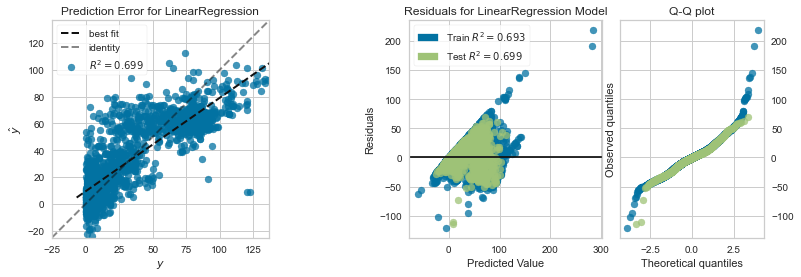

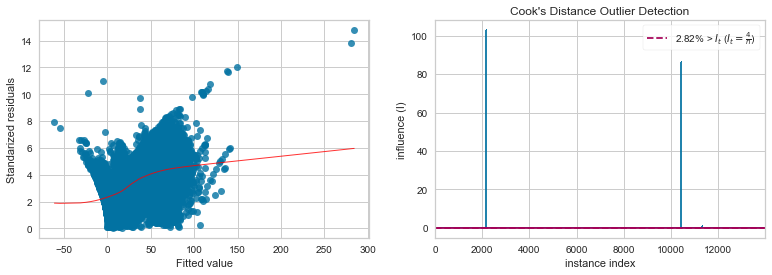

In [566]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
l, linMae = EvaluateRegressionEstimator('Linear Regression', regEstimator, X_cv_std, Y_cv, X_validation_std, Y_validation, cv_method)
regModel_stat = regModel_stat.append(l)

#Plot rediction Error, Residual and Cook's D
residualPlot(regEstimator, X_cv_std, Y_cv, X_validation_std, Y_validation)

### The Residuals vs. predicted value do not show random scatter indicating violation of Equal Variance Assumption

Check regression with log transformed response variable to see if it meets assumptions

In [567]:
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import math


linreg = LinearRegression()
parameters = {'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_method # KFolds = 10
                   , scoring='neg_mean_absolute_error')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_cv_std, Y_cv_log)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False)},
             scoring='neg_mean_absolute_error', verbose=1)

Parameterization of the best estimator: LinearRegression() 

The average MAE for all cv folds is: 			 0.65331
The average MAE percentage (MAPE) for all cv folds is: 	 18.451
The average RMSE for all cv folds is: 			 1.1559
The average R2 for all cv folds is: 			 0.31239
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
        MAE       MAPE      RMSE        R2
0  0.622799  27.623493  0.837477  0.684354
1  0.672937  34.224929  1.332484  0.338319
2  0.641031   6.899452  0.890719  0.687114
3  0.632392  11.427023  0.862281  0.683304
4  0.631626  19.623550  0.864730  0.699301
5  0.647465  34.514863  0.908012  0.653080
6  0.628492  24.216602  0.913901  0.680372
7  0.726303  -3.140343  3.004500 -2.541840
8  0.681311  17.186734  1.055737  0.583388
9  0.648738  11.934413  0.888935  0.656551

*********************************************
Prediction Error, Residual and Cook's D Plots
*********************************************


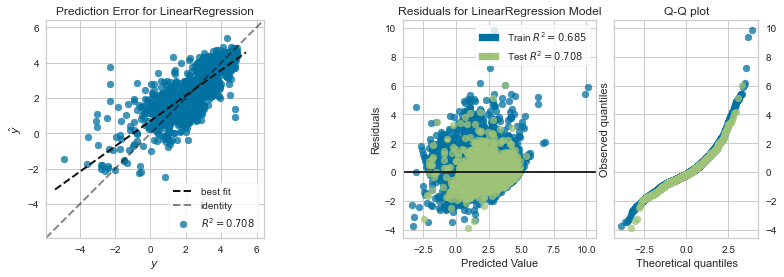

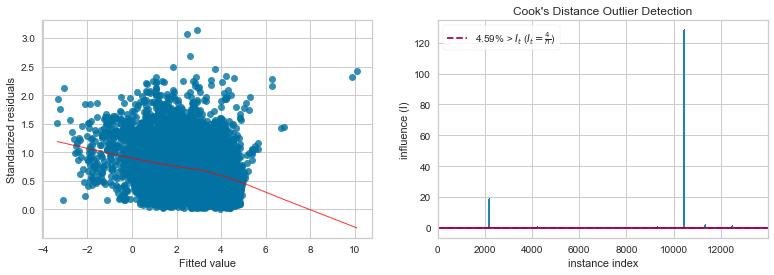

In [568]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
ly, linMae = EvaluateRegressionEstimator('Linear Regression: Log Y', regEstimator, X_cv_std, Y_cv_log, X_validation_std, Y_validation_log, cv_method)
regModel_stat = regModel_stat.append(ly)

#Plot rediction Error, Residual and Cook's D
residualPlot(regEstimator, X_cv_std, Y_cv_log, X_validation_std, Y_validation_log)

In [569]:
linear_weights = pd.DataFrame(X_cv.columns)
linear_weights['weight'] = regEstimator.coef_

linear_weights.sort_values('weight', ascending = False).head(10)

,0,weight
15,wtd_range_ThermalConductivity,0.333387
67,Ba,0.313182
12,mean_ThermalConductivity,0.232633
1,std_atomic_mass,0.167426
14,entropy_ThermalConductivity,0.128943
8,range_ElectronAffinity,0.123588
53,Nb,0.111021
50,Sr,0.108559
39,Fe,0.084574
9,gmean_FusionHeat,0.081765


### Regression with Log Y shows improvement in meeting assumption of Equal Variance on residuals

We will use log Y for the L1 and L2 models for comparison

,mean_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_atomic_radius,wtd_range_Density,wtd_std_Density,wtd_gmean_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,gmean_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,range_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp,critical_temp_log,Distance
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cd99.995Mn0.005,83.674522,28.736477,788.421816,160.983900,8649.194000,8.343651,1.500000,0.000545,0.0,9.119210,6.900,6.299025,51.850000,95.987890,0.264503,95.994815,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39,-0.941609,128.073836
Pr185Ce0.15Cu1O4,90.142263,53.101375,726.276976,240.164344,6460.132969,969.095194,52.848836,0.284342,91.0,3.241224,12.878,6.708783,106.006645,11.618180,0.257210,12.647350,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,2.995732,18.788731
B105,10.811000,0.000000,800.200000,0.000000,0.000000,0.000000,28.200000,0.000000,0.0,50.000000,0.000,0.000000,27.000000,27.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.405465,1.710386
Cr34.9Ga25V40.1,57.553533,8.615876,626.107924,34.571000,1033.310000,558.376597,49.400479,1.008514,35.4,13.773157,17.210,7.745300,51.333333,44.901119,0.938414,25.556000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.1,34.9,0.000,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.48,1.701105,1.360315
Fe30Zr70,73.534500,17.689500,707.656887,97.400000,2195.500000,624.605067,32.452283,0.418371,25.4,17.023513,7.200,10.560000,51.000000,33.304093,0.533769,7.600000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,-0.693147,0.539980


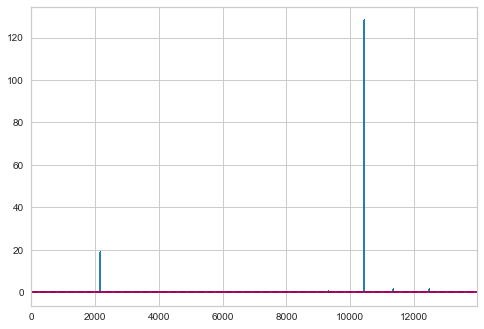

In [570]:
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X_cv_std, Y_cv_log)

cooks_df = modeling_df_cv

cooks_df['Distance'] = visualizer.distance_
cooks_df.sort_values('Distance', ascending = False).head()

A few observations show high leverage on Cook's D, may want to circle back and remove these for model improvement

## L1 LASSO Regression

In [571]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

LassoReg = Lasso(fit_intercept=True, copy_X=True
                ,max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
LassoAlpha = [0.001, 0.01, 0.1, 0.5, 1]
LassoParameters = {'alpha': LassoAlpha}

#Create a grid search object using the parameters above
LassoGridSearch = GridSearchCV(estimator=LassoReg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=LassoParameters
                   , cv=cv_method # KFolds = 10
                   , scoring='neg_mean_absolute_error')

#Perform hyperparameter search to find the best combination of parameters for our data
LassoGridSearch.fit(X_cv_std, Y_cv_log)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Lasso(random_state=0), n_jobs=8,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_absolute_error', verbose=1)

In [572]:
print("Best Parameters from search: ",LassoGridSearch.best_estimator_.get_params())

Best Parameters from search:  {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


Text(0, 0.5, 'MAE')

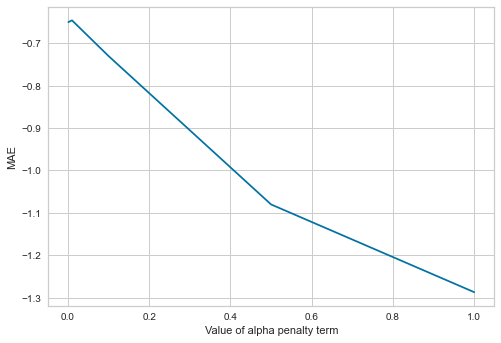

In [573]:
plt.plot(LassoAlpha, LassoGridSearch.cv_results_['mean_test_score'])
plt.xlabel('Value of alpha penalty term')
plt.ylabel('MAE')

Parameterization of the best estimator: Lasso(alpha=0.01, random_state=0) 

The average MAE for all cv folds is: 			 0.64612
The average MAE percentage (MAPE) for all cv folds is: 	 18.761
The average RMSE for all cv folds is: 			 0.89938
The average R2 for all cv folds is: 			 0.67324
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
        MAE       MAPE      RMSE        R2
0  0.628059  27.127395  0.834090  0.686902
1  0.651971  33.196656  0.945913  0.666553
2  0.647419   6.913804  0.895556  0.683707
3  0.635910  11.037128  0.856602  0.687461
4  0.633986  17.213770  0.868076  0.696970
5  0.654169  32.383919  0.912036  0.649998
6  0.632429  22.877127  0.894121  0.694058
7  0.643774   7.312188  0.915169  0.671385
8  0.682738  16.686638  0.989043  0.634362
9  0.650711  12.862393  0.883207  0.660962

*********************************************
Prediction Error, Residual and Cook's D Plots
*************************************

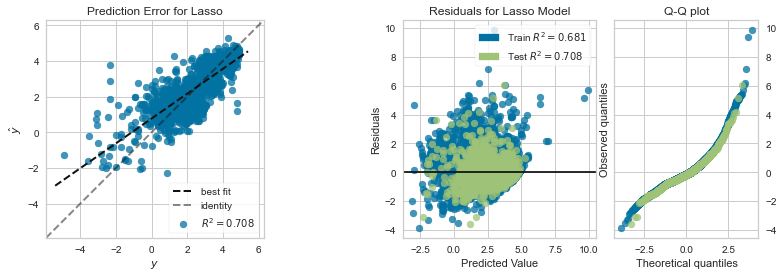

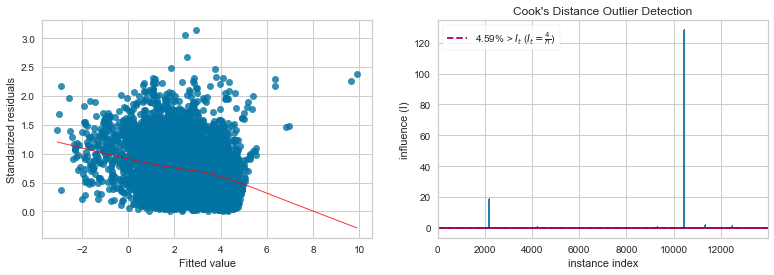

In [574]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
LassoEstimator = LassoGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
L1, LassoMae = EvaluateRegressionEstimator('LASSO Regression: Log Y', LassoEstimator, X_cv_std, Y_cv_log, X_validation_std, Y_validation_log, cv_method)
regModel_stat = regModel_stat.append(L1)

#Plot rediction Error, Residual and Cook's D
residualPlot(LassoEstimator, X_cv_std, Y_cv_log, X_validation_std, Y_validation_log)

In [575]:
L1_weights = pd.DataFrame(X_cv.columns)
L1_weights['weight'] = LassoEstimator.coef_

L1_weights.sort_values('weight', ascending = False).head(10)

,0,weight
15,wtd_range_ThermalConductivity,0.308498
67,Ba,0.306179
12,mean_ThermalConductivity,0.227586
1,std_atomic_mass,0.160349
14,entropy_ThermalConductivity,0.135621
50,Sr,0.103267
53,Nb,0.085533
8,range_ElectronAffinity,0.081450
21,C,0.080819
39,Fe,0.076952


## L2 Ridge Regression

Using <a id="ridgeGridSearch"></a> Grid Search to find the best ridge regression model

<a href="#bottom">Back to bottom</a>

In [576]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Ridge

ridgeReg = Ridge(fit_intercept=True, copy_X=True
                ,max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
ridgeAlpha = [0.001, 0.01, 0.1, 0.5, 1, 5,10, 20, 50, 100, 200, 300]
ridgeParameters = {'alpha': ridgeAlpha}

#Create a grid search object using the parameters above
ridgeGridSearch = GridSearchCV(estimator=ridgeReg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=ridgeParameters
                   , cv=cv_method # KFolds = 10
                   , scoring='neg_mean_absolute_error')

#Perform hyperparameter search to find the best combination of parameters for our data
ridgeGridSearch.fit(X_cv_std, Y_cv_log)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Ridge(max_iter=1000, random_state=0, tol=0.0001),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100,
                                   200, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [577]:
print("Best Parameters from search: ",ridgeGridSearch.best_estimator_.get_params())

Best Parameters from search:  {'alpha': 300, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'random_state': 0, 'solver': 'auto', 'tol': 0.0001}


Text(0, 0.5, 'MAE')

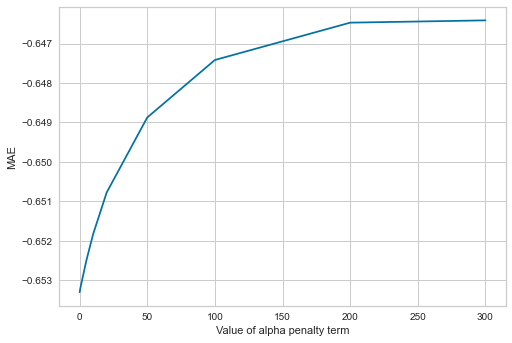

In [578]:
plt.plot(ridgeAlpha, ridgeGridSearch.cv_results_['mean_test_score'])
plt.xlabel('Value of alpha penalty term')
plt.ylabel('MAE')

### Run tuned model on the train dataset and check performance of the model on validation set

Parameterization of the best estimator: Ridge(alpha=300, max_iter=1000, random_state=0, tol=0.0001) 

The average MAE for all cv folds is: 			 0.64641
The average MAE percentage (MAPE) for all cv folds is: 	 18.876
The average RMSE for all cv folds is: 			 0.9218
The average R2 for all cv folds is: 			 0.65639
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
        MAE       MAPE      RMSE        R2
0  0.623600  27.272312  0.834062  0.686923
1  0.659498  33.831498  1.003896  0.624420
2  0.643157   6.653828  0.893667  0.685040
3  0.634110  11.006545  0.859912  0.685041
4  0.633307  18.700281  0.865658  0.698655
5  0.650973  33.688073  0.910497  0.651179
6  0.630360  24.009212  0.901819  0.688767
7  0.658529   5.039341  1.034889  0.579785
8  0.681258  16.888085  1.025339  0.607034
9  0.649319  11.670338  0.888240  0.657087

*********************************************
Prediction Error, Residual and Cook's D Plots
************

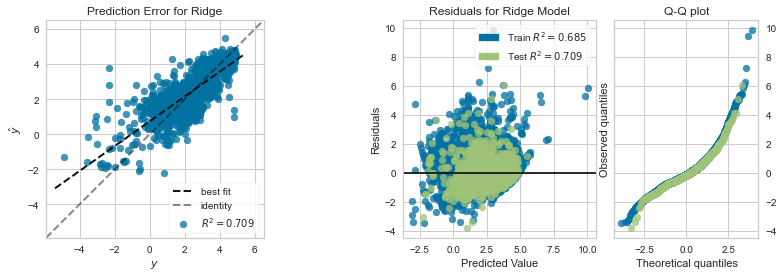

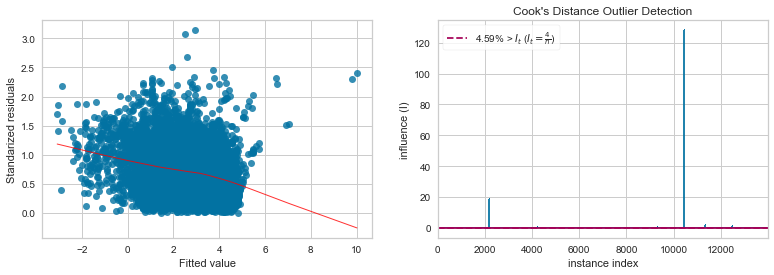

In [579]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
ridgeEstimator = ridgeGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
L2, ridgeMae = EvaluateRegressionEstimator('Ridge Regression: Log Y', ridgeEstimator, X_cv_std, Y_cv_log, X_validation_std, Y_validation_log, cv_method)
regModel_stat = regModel_stat.append(L2)

#Plot rediction Error, Residual and Cook's D
residualPlot(ridgeEstimator, X_cv_std, Y_cv_log, X_validation_std, Y_validation_log)

In [580]:

L2_weights = pd.DataFrame(X_cv.columns)
L2_weights['weight'] = ridgeEstimator.coef_

L2_weights.sort_values('weight', ascending = False).head(10)

,0,weight
67,Ba,0.307449
15,wtd_range_ThermalConductivity,0.300298
12,mean_ThermalConductivity,0.216635
1,std_atomic_mass,0.163542
8,range_ElectronAffinity,0.123948
14,entropy_ThermalConductivity,0.120385
50,Sr,0.107917
53,Nb,0.106354
39,Fe,0.076859
21,C,0.073305


**Ridge Yellow Brick Plot**
<a id="RidgeYB">

In [581]:
regModel_stat

,Model_name,MAE_model,MAPE_model,RMSE_model,R2_model,MAE_validation,MAPE_validation,RMSE_validation,R2_validation
0,Linear Regression,14.224509,923.744645,25.632014,0.277023,13.723703,430.943415,18.492736,0.698507
0,Linear Regression: Log Y,0.653309,18.451072,1.155878,0.312394,0.634205,40.204450,0.867168,0.708117
0,LASSO Regression: Log Y,0.646117,18.761102,0.899381,0.673236,0.636863,39.112683,0.867530,0.707874
0,Ridge Regression: Log Y,0.646411,18.875951,0.921798,0.656393,0.635360,39.073601,0.866320,0.708687
